In [4]:
import numpy
import pandas

df = pandas.read_csv("./data/ds1368_tx_All_Data_14_2015_1005_174847.txt", sep="\t")

# print(df[0:5])
# print(df.describe())

df = df[["Anon Student Id", "Problem Name", "Attempt At Step", "Step Name", "Is Last Attempt", "Outcome", "KC (Original)"]]
# print(df.describe())

df.rename(columns={"Anon Student Id":"s_id", "Problem Name":"p_id"}, inplace=True)
students = df["s_id"].unique()
problems = df["p_id"].unique()
df["ps_id"] = df["s_id"]+"~"+df["p_id"]#+"-"+df["Step Name"]
df["pstep_id"] = df["p_id"]+"~"+df["Step Name"]#+"-"+df["Step Name"]
df["p_id"] = df["p_id"]#+"-"+df["Step Name"]

unique_steps = df["Step Name"].unique()

unique_ps_pairs = df["ps_id"].unique()
ocs = df["Outcome"]
print(len(students), len(problems), len(unique_steps))
print(len(unique_ps_pairs),"unique PS pairs")
print(unique_ps_pairs)

# for u, o in zip(unique_ps_pairs,ocs):
#     print(u,o)

print(df.pstep_id.unique())

59 40 78
958 unique PS pairs
['Stu_011b2ea4facf6b0918d76c91afb0831f~DOG_ON_A_ROPE'
 'Stu_011b2ea4facf6b0918d76c91afb0831f~LAWN_SPRINKLER_2'
 'Stu_011b2ea4facf6b0918d76c91afb0831f~CIRCLE_DIAMETER'
 'Stu_011b2ea4facf6b0918d76c91afb0831f~CIRCLE_AREA'
 'Stu_011b2ea4facf6b0918d76c91afb0831f~CIRCLE_CIRCUMFERENCE'
 'Stu_011b2ea4facf6b0918d76c91afb0831f~LAWN_SPRINKLER'
 'Stu_011b2ea4facf6b0918d76c91afb0831f~CIRCLE_RADIUS'
 'Stu_02dd51930962a6c4ef2ff9c63d035c4a~TRAPEZOID_ABCD'
 'Stu_02dd51930962a6c4ef2ff9c63d035c4a~TRAPEZOID_AREA'
 'Stu_02dd51930962a6c4ef2ff9c63d035c4a~TRAPEZOID_HEIGHT'
 'Stu_02dd51930962a6c4ef2ff9c63d035c4a~TRAPEZOID_BASE'
 'Stu_048fd8824ba2329dd9a8085692b601e4~RECTANGLE_ABCD'
 'Stu_048fd8824ba2329dd9a8085692b601e4~BUILDING_A_SIDEWALK'
 'Stu_048fd8824ba2329dd9a8085692b601e4~PARALLELOGRAM_ABDE'
 'Stu_048fd8824ba2329dd9a8085692b601e4~SQUARE_ABCD'
 'Stu_048fd8824ba2329dd9a8085692b601e4~PAINTING_THE_WALL'
 'Stu_048fd8824ba2329dd9a8085692b601e4~TRAPEZOID_ABCD'
 'Stu_048fd8824ba2329

In [2]:
from collections import defaultdict
p_st = defaultdict(set)
KCs = set()
p_kc = defaultdict(set)
for p in problems:
    sp_step_df = df[df["p_id"]==p]#.sort_values(by=["Step End Time"])
    #print(sp_step_df)
    for st in sp_step_df["Step Name"].unique():
        p_st[p].add(st)
    for kc in sp_step_df["KC (Original)"]:
        KCs.add(kc)
        p_kc[p].add(kc)

df2 = pandas.DataFrame(index=problems, columns=["#kcs","#steps"])
for p in p_st:
#     print("({})\t\t".format(p),p_st[p])
#     print("({})\t\t".format(p),len(p_kc[p]))
    df2.loc[p]=([len(p_kc[p]), len(p_st[p])])
    
print(df2)

                       #kcs  #steps
DOG_ON_A_ROPE             2       2
LAWN_SPRINKLER_2          3       3
CIRCLE_DIAMETER           3       3
CIRCLE_AREA               3       3
CIRCLE_CIRCUMFERENCE      3       3
LAWN_SPRINKLER            1       1
CIRCLE_RADIUS             3       3
TRAPEZOID_ABCD            3       3
TRAPEZOID_AREA            1       1
TRAPEZOID_HEIGHT          1       1
TRAPEZOID_BASE            1       1
RECTANGLE_ABCD            2       3
BUILDING_A_SIDEWALK       2       9
PARALLELOGRAM_ABDE        2       3
SQUARE_ABCD               2       3
PAINTING_THE_WALL         2       9
TRIANGLE_ABC              2       3
TRIANGLE_TRIANGLE         1       1
PENTAGON                  2       3
TRIANGLE_RECTANGLE        2       2
DESIGNING_A_QUILT         2      12
PENTAGON_ABCDE            2       3
TRIANGLE_AREA             1       1
TRIANGLE_HEIGHT           1       1
TRIANGLE_BASE             1       1
CIRCLE_O                  4      13
COVERING_POOL             2 

In [13]:
#in this cell we split the problems for use with LFA embeddings ... we need to pretend we cannot see the substeps
print("#probs",len(problems))
print("#students",len(students))
print("#KCs",len(df["KC (Original)"].unique()))
# print(df[0:10])

all_sz = []
all_qz = []
all_pfz= []

q_pass = defaultdict(int)
q_atts = defaultdict(int)

qixs = []
sct=-1

all_sz = df["s_id"]
all_qz = df["pstep_id"]
all_pfz = (df["Outcome"]=="CORRECT").astype(int)
for s,q,pf in zip(all_sz, all_qz, all_pfz):
    print(s, q, pf)

pickle.dump((all_sz, all_qz, all_pfz), open("./real_data/cmu_geom_steplevel.p", "wb"))
print("dumpage complete")

#probs 40
#students 59
#KCs 15
Stu_011b2ea4facf6b0918d76c91afb0831f DOG_ON_A_ROPE~(AREA QUESTION1) 0
Stu_011b2ea4facf6b0918d76c91afb0831f DOG_ON_A_ROPE~(AREA QUESTION1) 1
Stu_011b2ea4facf6b0918d76c91afb0831f DOG_ON_A_ROPE~(CIRCUMFERENCE QUESTION1) 0
Stu_011b2ea4facf6b0918d76c91afb0831f DOG_ON_A_ROPE~(CIRCUMFERENCE QUESTION1) 1
Stu_011b2ea4facf6b0918d76c91afb0831f LAWN_SPRINKLER_2~(WATERED-LAWN-AREA QUESTION1) 0
Stu_011b2ea4facf6b0918d76c91afb0831f LAWN_SPRINKLER_2~(WATERED-LAWN-AREA QUESTION1) 1
Stu_011b2ea4facf6b0918d76c91afb0831f LAWN_SPRINKLER_2~(TOTAL-LAWN-AREA QUESTION1) 1
Stu_011b2ea4facf6b0918d76c91afb0831f LAWN_SPRINKLER_2~(UNWATERED-LAWN-AREA QUESTION1) 1
Stu_011b2ea4facf6b0918d76c91afb0831f CIRCLE_DIAMETER~(RADIUS QUESTION1) 1
Stu_011b2ea4facf6b0918d76c91afb0831f CIRCLE_DIAMETER~(AREA QUESTION1) 1
Stu_011b2ea4facf6b0918d76c91afb0831f CIRCLE_DIAMETER~(CIRCUMFERENCE QUESTION1) 1
Stu_011b2ea4facf6b0918d76c91afb0831f CIRCLE_AREA~(RADIUS QUESTION3) 0
Stu_011b2ea4facf6b0918d76c91af

Stu_3a9b8e27b925c73a848a9ac0341743af PARALLELOGRAM_ABDE~(BASE QUESTION3) 1
Stu_3a9b8e27b925c73a848a9ac0341743af SQUARE_ABCD~(AREA QUESTION1) 1
Stu_3a9b8e27b925c73a848a9ac0341743af SQUARE_ABCD~(HEIGHT QUESTION2) 1
Stu_3a9b8e27b925c73a848a9ac0341743af SQUARE_ABCD~(BASE QUESTION3) 1
Stu_3a9b8e27b925c73a848a9ac0341743af PAINTING_THE_WALL~(DOOR-AREA QUESTION1) 1
Stu_3a9b8e27b925c73a848a9ac0341743af PAINTING_THE_WALL~(DOOR-AREA QUESTION2) 1
Stu_3a9b8e27b925c73a848a9ac0341743af PAINTING_THE_WALL~(DOOR-AREA QUESTION3) 1
Stu_3a9b8e27b925c73a848a9ac0341743af PAINTING_THE_WALL~(WALL-AREA QUESTION1) 1
Stu_3a9b8e27b925c73a848a9ac0341743af PAINTING_THE_WALL~(WALL-AREA QUESTION2) 1
Stu_3a9b8e27b925c73a848a9ac0341743af PAINTING_THE_WALL~(WALL-AREA QUESTION3) 1
Stu_3a9b8e27b925c73a848a9ac0341743af PAINTING_THE_WALL~(PAINTED-AREA QUESTION1) 1
Stu_3a9b8e27b925c73a848a9ac0341743af PAINTING_THE_WALL~(PAINTED-AREA QUESTION2) 1
Stu_3a9b8e27b925c73a848a9ac0341743af PAINTING_THE_WALL~(PAINTED-AREA QUESTION3) 1

Stu_48ff5e4b7856c846fffccaa09ec55e53 PENTAGON_ABCDE~(SIDE QUESTION3) 1
Stu_48ff5e4b7856c846fffccaa09ec55e53 TRIANGLE_AREA~(AREA QUESTION1) 1
Stu_48ff5e4b7856c846fffccaa09ec55e53 DESIGNING_A_QUILT~(AREA QUESTION1) 0
Stu_48ff5e4b7856c846fffccaa09ec55e53 DESIGNING_A_QUILT~(AREA QUESTION1) 1
Stu_48ff5e4b7856c846fffccaa09ec55e53 DESIGNING_A_QUILT~(WHITE-AREA QUESTION1) 1
Stu_48ff5e4b7856c846fffccaa09ec55e53 DESIGNING_A_QUILT~(GREEN-AREA QUESTION1) 1
Stu_48ff5e4b7856c846fffccaa09ec55e53 DESIGNING_A_QUILT~(PURPLE-AREA QUESTION1) 1
Stu_48ff5e4b7856c846fffccaa09ec55e53 DESIGNING_A_QUILT~(AREA QUESTION2) 1
Stu_48ff5e4b7856c846fffccaa09ec55e53 DESIGNING_A_QUILT~(WHITE-AREA QUESTION2) 1
Stu_48ff5e4b7856c846fffccaa09ec55e53 DESIGNING_A_QUILT~(GREEN-AREA QUESTION2) 1
Stu_48ff5e4b7856c846fffccaa09ec55e53 DESIGNING_A_QUILT~(PURPLE-AREA QUESTION2) 1
Stu_48ff5e4b7856c846fffccaa09ec55e53 DESIGNING_A_QUILT~(AREA QUESTION3) 0
Stu_48ff5e4b7856c846fffccaa09ec55e53 DESIGNING_A_QUILT~(AREA QUESTION3) 1
Stu_48f

Stu_56263844a5390b6c2b07e563b6781a2c RECTANGLE_ABCD~(AREA QUESTION1) 1
Stu_56263844a5390b6c2b07e563b6781a2c RECTANGLE_ABCD~(HEIGHT QUESTION2) 1
Stu_56263844a5390b6c2b07e563b6781a2c RECTANGLE_ABCD~(BASE QUESTION3) 1
Stu_56263844a5390b6c2b07e563b6781a2c BUILDING_A_SIDEWALK~(POOL-AREA QUESTION1) 0
Stu_56263844a5390b6c2b07e563b6781a2c BUILDING_A_SIDEWALK~(POOL-AREA QUESTION1) 1
Stu_56263844a5390b6c2b07e563b6781a2c BUILDING_A_SIDEWALK~(LARGE-RECTANGLE-AREA QUESTION1) 1
Stu_56263844a5390b6c2b07e563b6781a2c BUILDING_A_SIDEWALK~(SIDEWALK-AREA QUESTION1) 0
Stu_56263844a5390b6c2b07e563b6781a2c BUILDING_A_SIDEWALK~(SIDEWALK-AREA QUESTION1) 1
Stu_56263844a5390b6c2b07e563b6781a2c BUILDING_A_SIDEWALK~(POOL-AREA QUESTION2) 1
Stu_56263844a5390b6c2b07e563b6781a2c BUILDING_A_SIDEWALK~(LARGE-RECTANGLE-AREA QUESTION2) 1
Stu_56263844a5390b6c2b07e563b6781a2c BUILDING_A_SIDEWALK~(POOL-AREA QUESTION3) 0
Stu_56263844a5390b6c2b07e563b6781a2c BUILDING_A_SIDEWALK~(POOL-AREA QUESTION3) 1
Stu_56263844a5390b6c2b07e5

Stu_6f247396530990c8b4464550198c9ef2 TRAPEZOID_ABCD~(LONGER-BASE QUESTION2) 1
Stu_6f247396530990c8b4464550198c9ef2 TRAPEZOID_ABCD~(HEIGHT QUESTION3) 1
Stu_6f247396530990c8b4464550198c9ef2 TRAPEZOID_ABCD~(AREA QUESTION1) 1
Stu_6f247396530990c8b4464550198c9ef2 TRAPEZOID_ABCD~(LONGER-BASE QUESTION2) 1
Stu_6f247396530990c8b4464550198c9ef2 TRAPEZOID_ABCD~(HEIGHT QUESTION3) 1
Stu_6f247396530990c8b4464550198c9ef2 TRIANGLE_ABC~(AREA QUESTION1) 1
Stu_6f247396530990c8b4464550198c9ef2 TRIANGLE_ABC~(HEIGHT QUESTION2) 0
Stu_6f247396530990c8b4464550198c9ef2 TRIANGLE_ABC~(HEIGHT QUESTION2) 1
Stu_6f247396530990c8b4464550198c9ef2 TRIANGLE_ABC~(AREA QUESTION1) 1
Stu_6f247396530990c8b4464550198c9ef2 TRIANGLE_ABC~(HEIGHT QUESTION2) 1
Stu_6f247396530990c8b4464550198c9ef2 TRIANGLE_ABC~(BASE QUESTION3) 0
Stu_6f247396530990c8b4464550198c9ef2 TRIANGLE_ABC~(BASE QUESTION3) 1
Stu_6f247396530990c8b4464550198c9ef2 TRIANGLE_TRIANGLE~(AREA QUESTION1) 1
Stu_6f247396530990c8b4464550198c9ef2 PENTAGON~(AREA QUESTION1) 0

Stu_8869afa6dadddb9a193e17821e20e1e1 CIRCLE_O~(AREA QUESTION1) 1
Stu_8869afa6dadddb9a193e17821e20e1e1 CIRCLE_O~(CIRCUMFERENCE QUESTION1) 0
Stu_8869afa6dadddb9a193e17821e20e1e1 CIRCLE_O~(CIRCUMFERENCE QUESTION1) 1
Stu_8869afa6dadddb9a193e17821e20e1e1 CIRCLE_O~(DIAMETER QUESTION2) 1
Stu_8869afa6dadddb9a193e17821e20e1e1 CIRCLE_O~(AREA QUESTION2) 0
Stu_8869afa6dadddb9a193e17821e20e1e1 CIRCLE_O~(AREA QUESTION2) 1
Stu_8869afa6dadddb9a193e17821e20e1e1 CIRCLE_O~(CIRCUMFERENCE QUESTION2) 0
Stu_8869afa6dadddb9a193e17821e20e1e1 CIRCLE_O~(CIRCUMFERENCE QUESTION2) 1
Stu_8869afa6dadddb9a193e17821e20e1e1 CIRCLE_O~(RADIUS QUESTION3) 1
Stu_8869afa6dadddb9a193e17821e20e1e1 CIRCLE_O~(DIAMETER QUESTION3) 1
Stu_8869afa6dadddb9a193e17821e20e1e1 CIRCLE_O~(CIRCUMFERENCE QUESTION3) 0
Stu_8869afa6dadddb9a193e17821e20e1e1 CIRCLE_O~(CIRCUMFERENCE QUESTION3) 1
Stu_8869afa6dadddb9a193e17821e20e1e1 CIRCLE_O~(DIAMETER QUESTION4) 1
Stu_8869afa6dadddb9a193e17821e20e1e1 CIRCLE_O~(RADIUS QUESTION4) 1
Stu_8869afa6dadddb9a

Stu_c39f98c3a67788930c87b77653358d47 TROGS~(TROG-AREA QUESTION3) 1
Stu_c39f98c3a67788930c87b77653358d47 TROGS~(SQUARE-AREA QUESTION3) 1
Stu_c39f98c3a67788930c87b77653358d47 TROGS~(SCRAP-METAL-AREA QUESTION3) 1
Stu_c39f98c3a67788930c87b77653358d47 WATERING_VEGGIES~(WATERED-AREA QUESTION1) 0
Stu_c39f98c3a67788930c87b77653358d47 WATERING_VEGGIES~(WATERED-AREA QUESTION1) 1
Stu_c39f98c3a67788930c87b77653358d47 WATERING_VEGGIES~(TOTAL-GARDEN QUESTION1) 1
Stu_c39f98c3a67788930c87b77653358d47 WATERING_VEGGIES~(UNWATERED-AREA QUESTION1) 1
Stu_c39f98c3a67788930c87b77653358d47 POGS~(POG-AREA QUESTION1) 1
Stu_c39f98c3a67788930c87b77653358d47 POGS~(SQUARE-AREA QUESTION1) 0
Stu_c39f98c3a67788930c87b77653358d47 POGS~(SQUARE-AREA QUESTION1) 1
Stu_c39f98c3a67788930c87b77653358d47 POGS~(SCRAP-METAL-AREA QUESTION1) 0
Stu_c39f98c3a67788930c87b77653358d47 POGS~(SCRAP-METAL-AREA QUESTION1) 1
Stu_c39f98c3a67788930c87b77653358d47 POGS~(SQUARE-AREA QUESTION2) 1
Stu_c39f98c3a67788930c87b77653358d47 POGS~(POG-AR

Stu_d55a09859b7140ed10a16129c43b912a PAINTING_THE_WALL~(DOOR-AREA QUESTION2) 1
Stu_d55a09859b7140ed10a16129c43b912a PAINTING_THE_WALL~(PAINTED-AREA QUESTION2) 1
Stu_d55a09859b7140ed10a16129c43b912a PAINTING_THE_WALL~(WALL-AREA QUESTION3) 1
Stu_d55a09859b7140ed10a16129c43b912a PAINTING_THE_WALL~(DOOR-AREA QUESTION3) 1
Stu_d55a09859b7140ed10a16129c43b912a PAINTING_THE_WALL~(PAINTED-AREA QUESTION3) 1
Stu_d55a09859b7140ed10a16129c43b912a TRAPEZOID_ABCD~(AREA QUESTION1) 1
Stu_d55a09859b7140ed10a16129c43b912a TRAPEZOID_ABCD~(AREA QUESTION1) 1
Stu_d55a09859b7140ed10a16129c43b912a TRAPEZOID_ABCD~(LONGER-BASE QUESTION2) 0
Stu_d55a09859b7140ed10a16129c43b912a TRAPEZOID_ABCD~(LONGER-BASE QUESTION2) 1
Stu_d55a09859b7140ed10a16129c43b912a TRAPEZOID_ABCD~(HEIGHT QUESTION3) 0
Stu_d55a09859b7140ed10a16129c43b912a TRAPEZOID_ABCD~(HEIGHT QUESTION3) 1
Stu_d55a09859b7140ed10a16129c43b912a TRAPEZOID_AREA~(AREA QUESTION1) 0
Stu_d55a09859b7140ed10a16129c43b912a TRAPEZOID_AREA~(AREA QUESTION1) 1
Stu_d55a09859

Stu_ecc4309737d7c8f74239e6696dd8b4f3 CIRCLE_CIRCUMFERENCE~(RADIUS QUESTION4) 1
Stu_ecc4309737d7c8f74239e6696dd8b4f3 CIRCLE_CIRCUMFERENCE~(DIAMETER QUESTION4) 1
Stu_ecc4309737d7c8f74239e6696dd8b4f3 CIRCLE_CIRCUMFERENCE~(AREA QUESTION4) 1
Stu_ecc4309737d7c8f74239e6696dd8b4f3 CIRCLE_O~(RADIUS QUESTION1) 1
Stu_ecc4309737d7c8f74239e6696dd8b4f3 CIRCLE_O~(AREA QUESTION1) 1
Stu_ecc4309737d7c8f74239e6696dd8b4f3 CIRCLE_O~(CIRCUMFERENCE QUESTION1) 1
Stu_ecc4309737d7c8f74239e6696dd8b4f3 CIRCLE_O~(DIAMETER QUESTION2) 1
Stu_ecc4309737d7c8f74239e6696dd8b4f3 CIRCLE_O~(AREA QUESTION2) 1
Stu_ecc4309737d7c8f74239e6696dd8b4f3 CIRCLE_O~(CIRCUMFERENCE QUESTION2) 1
Stu_ecc4309737d7c8f74239e6696dd8b4f3 CIRCLE_O~(RADIUS QUESTION3) 1
Stu_ecc4309737d7c8f74239e6696dd8b4f3 CIRCLE_O~(DIAMETER QUESTION3) 1
Stu_ecc4309737d7c8f74239e6696dd8b4f3 CIRCLE_O~(CIRCUMFERENCE QUESTION3) 1
Stu_ecc4309737d7c8f74239e6696dd8b4f3 CIRCLE_O~(RADIUS QUESTION4) 0
Stu_ecc4309737d7c8f74239e6696dd8b4f3 CIRCLE_O~(RADIUS QUESTION4) 1
Stu_e

In [6]:
print("#probs",len(problems))
print("#students",len(students))
print("#KCs",len(df["KC (Original)"].unique()))
# print(df[0:10])

all_sz = []
all_qz = []
all_pfz= []

q_pass = defaultdict(int)
q_atts = defaultdict(int)

qixs = []
sct=-1
for s in students:
    sct+=1
    s_df = df[df["s_id"]==s]
    students_problems = s_df["p_id"].unique()
    
    for p in students_problems:
        sp_step_df = s_df[(s_df["p_id"]==p)] # & (s_df["Outcome"]=="CORRECT" )]#.sort_values(by=["Step End Time"])
        print(s,p)
#         print(sp_step_df)
                          
#         max_atts = numpy.max(sp_step_df["Attempt At Step"])
#         max_atts = len(sp_step_df[sp_step_df["Outcome"]!="CORRECT"]["Attempt At Step"])
#         step_passes = len(sp_step_df[sp_step_df["Outcome"]=="CORRECT"]["Attempt At Step"])
#         print(max_atts, step_passes)
# #         max_atts=(max_atts+step_passes)
#         print("max_atts for",p,"=",max_atts)
        max_atts = 1
#         for ind,row in sp_step_df[["Step Name","Attempt At Step","Outcome","KC (Original)"]].iterrows():
#             print("\t", list(row))
            
#         if False: #p not in students_problems:
#             pass
#             all_pfz.append(0.5)
#             q_pass[p]+=0.5
#         else:
        if p not in qixs:
            qixs.append(p)
        qix = qixs.index(p)
        
        steps_not_done = p_st[p] - set(sp_step_df[sp_step_df["Outcome"]=="CORRECT"]["Step Name"])
#         results_on_this_step = list(sp_step_df["Outcome"])
#         print(results_on_this_step)
#         steps_not_done = [] if "CORRECT" in results_on_this_step else [1]
  
    
#         for r in results_on_this_step:
#             if r=="CORRECT":
#                 all_sz.append(sct)
#                 all_qz.append(qix)
#                 all_pfz.append(1)
#                 q_pass[p]+=1
#             else:
#                 all_sz.append(sct)
#                 all_qz.append(qix)
#                 all_pfz.append(0)
#             q_atts[p]+=1
    
#         print("steps not done", steps_not_done)
        if len(steps_not_done)==0: #empty set
#             for _ in range(round(step_passes)):
#             n_ones = sum(all_pfz)
#             n_zeros = len(all_pfz) - n_ones 
#             if (n_zeros>n_ones):
            all_sz.append(sct)
            all_qz.append(qix)
            all_pfz.append(1)
            q_pass[p]+=1
        else:
            for _ in range(round(max_atts)):        
                all_sz.append(sct)
                all_qz.append(qix)
                all_pfz.append(0)
        q_atts[p]+=1

all_sz = numpy.array(all_sz).reshape([-1,1])
all_qz = numpy.array(all_qz).reshape([-1,1])
all_pfz = numpy.array(all_pfz).reshape([-1,1])

print(len(all_pfz), numpy.sum(all_pfz))


#probs 40
#students 59
#KCs 15
Stu_011b2ea4facf6b0918d76c91afb0831f DOG_ON_A_ROPE
Stu_011b2ea4facf6b0918d76c91afb0831f LAWN_SPRINKLER_2
Stu_011b2ea4facf6b0918d76c91afb0831f CIRCLE_DIAMETER
Stu_011b2ea4facf6b0918d76c91afb0831f CIRCLE_AREA
Stu_011b2ea4facf6b0918d76c91afb0831f CIRCLE_CIRCUMFERENCE
Stu_011b2ea4facf6b0918d76c91afb0831f LAWN_SPRINKLER
Stu_011b2ea4facf6b0918d76c91afb0831f CIRCLE_RADIUS
Stu_02dd51930962a6c4ef2ff9c63d035c4a TRAPEZOID_ABCD
Stu_02dd51930962a6c4ef2ff9c63d035c4a TRAPEZOID_AREA
Stu_02dd51930962a6c4ef2ff9c63d035c4a TRAPEZOID_HEIGHT
Stu_02dd51930962a6c4ef2ff9c63d035c4a TRAPEZOID_BASE
Stu_048fd8824ba2329dd9a8085692b601e4 RECTANGLE_ABCD
Stu_048fd8824ba2329dd9a8085692b601e4 BUILDING_A_SIDEWALK
Stu_048fd8824ba2329dd9a8085692b601e4 PARALLELOGRAM_ABDE
Stu_048fd8824ba2329dd9a8085692b601e4 SQUARE_ABCD
Stu_048fd8824ba2329dd9a8085692b601e4 PAINTING_THE_WALL
Stu_048fd8824ba2329dd9a8085692b601e4 TRAPEZOID_ABCD
Stu_048fd8824ba2329dd9a8085692b601e4 TRAPEZOID_AREA
Stu_078c3d9d1f4aca

Stu_3a9b8e27b925c73a848a9ac0341743af POGS
Stu_3a9b8e27b925c73a848a9ac0341743af ONE_CIRCLE_IN_CIRCLE
Stu_3a9b8e27b925c73a848a9ac0341743af ONE_CIRCLE_IN_SQUARE
Stu_3a9b8e27b925c73a848a9ac0341743af TWO_CIRCLES_IN_CIRCLE
Stu_3a9b8e27b925c73a848a9ac0341743af TWO_CIRCLES_IN_SQUARE
Stu_3a9b8e27b925c73a848a9ac0341743af TRIANGLE_AREA
Stu_3a9b8e27b925c73a848a9ac0341743af RECTANGLE_AREA
Stu_3a9b8e27b925c73a848a9ac0341743af PARALLELOGRAM_AREA
Stu_3a9b8e27b925c73a848a9ac0341743af SQUARE_AREA
Stu_3a9b8e27b925c73a848a9ac0341743af CIRCLE_CIRCUMFERENCE
Stu_3c66867052179d29aece9e556050a313 RECTANGLE_HEIGHT
Stu_3c66867052179d29aece9e556050a313 RECTANGLE_BASE
Stu_3c66867052179d29aece9e556050a313 PARALLELOGRAM_HEIGHT
Stu_3c66867052179d29aece9e556050a313 TRAPEZOID_ABCD
Stu_3e09797c6a706c607366c044dae8ef45 RECTANGLE_ABCD
Stu_3e09797c6a706c607366c044dae8ef45 BUILDING_A_SIDEWALK
Stu_3e09797c6a706c607366c044dae8ef45 PARALLELOGRAM_ABDE
Stu_3e09797c6a706c607366c044dae8ef45 SQUARE_ABCD
Stu_3e09797c6a706c607366c044

Stu_5046a9958b6d489aa529be890cb7cb8f CIRCLE_AREA
Stu_5046a9958b6d489aa529be890cb7cb8f CIRCLE_RADIUS
Stu_5046a9958b6d489aa529be890cb7cb8f CIRCLE_CIRCUMFERENCE
Stu_5046a9958b6d489aa529be890cb7cb8f TROGS
Stu_5046a9958b6d489aa529be890cb7cb8f WATERING_VEGGIES
Stu_5046a9958b6d489aa529be890cb7cb8f POGS
Stu_5046a9958b6d489aa529be890cb7cb8f ONE_CIRCLE_IN_SQUARE
Stu_5046a9958b6d489aa529be890cb7cb8f TWO_CIRCLES_IN_CIRCLE
Stu_5046a9958b6d489aa529be890cb7cb8f TWO_CIRCLES_IN_SQUARE
Stu_5046a9958b6d489aa529be890cb7cb8f TRIANGLE_AREA
Stu_5114edb143c95b7d599717b63807cdca PAINTING_THE_WALL
Stu_5114edb143c95b7d599717b63807cdca TRAPEZOID_ABCD
Stu_51f14c280c8595a335bb9e27283bb308 RECTANGLE_ABCD
Stu_51f14c280c8595a335bb9e27283bb308 BUILDING_A_SIDEWALK
Stu_51f14c280c8595a335bb9e27283bb308 PARALLELOGRAM_ABDE
Stu_51f14c280c8595a335bb9e27283bb308 SQUARE_ABCD
Stu_51f14c280c8595a335bb9e27283bb308 PAINTING_THE_WALL
Stu_51f14c280c8595a335bb9e27283bb308 RECTANGLE_AREA
Stu_51f14c280c8595a335bb9e27283bb308 TRAPEZOID_A

Stu_8869afa6dadddb9a193e17821e20e1e1 LAWN_SPRINKLER
Stu_8869afa6dadddb9a193e17821e20e1e1 COVERING_POOL
Stu_8869afa6dadddb9a193e17821e20e1e1 DOG_ON_A_ROPE
Stu_8869afa6dadddb9a193e17821e20e1e1 LAWN_SPRINKLER_2
Stu_8869afa6dadddb9a193e17821e20e1e1 CIRCLE_DIAMETER
Stu_8869afa6dadddb9a193e17821e20e1e1 CIRCLE_RADIUS
Stu_8869afa6dadddb9a193e17821e20e1e1 CIRCLE_AREA
Stu_8869afa6dadddb9a193e17821e20e1e1 CIRCLE_CIRCUMFERENCE
Stu_8869afa6dadddb9a193e17821e20e1e1 TROGS
Stu_8869afa6dadddb9a193e17821e20e1e1 WATERING_VEGGIES
Stu_8869afa6dadddb9a193e17821e20e1e1 POGS
Stu_8869afa6dadddb9a193e17821e20e1e1 ONE_CIRCLE_IN_SQUARE
Stu_8869afa6dadddb9a193e17821e20e1e1 TWO_CIRCLES_IN_CIRCLE
Stu_8869afa6dadddb9a193e17821e20e1e1 TWO_CIRCLES_IN_SQUARE
Stu_8869afa6dadddb9a193e17821e20e1e1 TRIANGLE_AREA
Stu_888dfdb436c362a03dbf0410c0c05921 DOG_ON_A_ROPE
Stu_888dfdb436c362a03dbf0410c0c05921 LAWN_SPRINKLER_2
Stu_888dfdb436c362a03dbf0410c0c05921 CIRCLE_DIAMETER
Stu_888dfdb436c362a03dbf0410c0c05921 CIRCLE_CIRCUMFERENCE

Stu_cfe6ab2a8660fdf288fdc82f72f2d637 TRIANGLE_TRIANGLE
Stu_cfe6ab2a8660fdf288fdc82f72f2d637 PENTAGON
Stu_cfe6ab2a8660fdf288fdc82f72f2d637 TRIANGLE_RECTANGLE
Stu_cfe6ab2a8660fdf288fdc82f72f2d637 DESIGNING_A_QUILT
Stu_cfe6ab2a8660fdf288fdc82f72f2d637 PENTAGON_ABCDE
Stu_cfe6ab2a8660fdf288fdc82f72f2d637 TRIANGLE_HEIGHT
Stu_cfe6ab2a8660fdf288fdc82f72f2d637 TRIANGLE_BASE
Stu_cfe6ab2a8660fdf288fdc82f72f2d637 CIRCLE_O
Stu_cfe6ab2a8660fdf288fdc82f72f2d637 LAWN_SPRINKLER
Stu_cfe6ab2a8660fdf288fdc82f72f2d637 COVERING_POOL
Stu_cfe6ab2a8660fdf288fdc82f72f2d637 DOG_ON_A_ROPE
Stu_cfe6ab2a8660fdf288fdc82f72f2d637 LAWN_SPRINKLER_2
Stu_cfe6ab2a8660fdf288fdc82f72f2d637 CIRCLE_DIAMETER
Stu_cfe6ab2a8660fdf288fdc82f72f2d637 CIRCLE_AREA
Stu_cfe6ab2a8660fdf288fdc82f72f2d637 CIRCLE_RADIUS
Stu_cfe6ab2a8660fdf288fdc82f72f2d637 CIRCLE_CIRCUMFERENCE
Stu_cfe6ab2a8660fdf288fdc82f72f2d637 TROGS
Stu_cfe6ab2a8660fdf288fdc82f72f2d637 WATERING_VEGGIES
Stu_cfe6ab2a8660fdf288fdc82f72f2d637 POGS
Stu_cfe6ab2a8660fdf288fdc82f

Stu_ed43baddfc7caada939cb5160e4d6a24 TWO_CIRCLES_IN_CIRCLE
Stu_ed43baddfc7caada939cb5160e4d6a24 TWO_CIRCLES_IN_SQUARE
Stu_ed43baddfc7caada939cb5160e4d6a24 CIRCLE_CIRCUMFERENCE
Stu_ed43baddfc7caada939cb5160e4d6a24 CIRCLE_RADIUS
Stu_fc3a6f9fe4beaac8ceed74c70339f48d RECTANGLE_ABCD
Stu_fc3a6f9fe4beaac8ceed74c70339f48d BUILDING_A_SIDEWALK
Stu_fc3a6f9fe4beaac8ceed74c70339f48d PARALLELOGRAM_ABDE
Stu_fc3a6f9fe4beaac8ceed74c70339f48d SQUARE_ABCD
Stu_fc3a6f9fe4beaac8ceed74c70339f48d PAINTING_THE_WALL
Stu_fc3a6f9fe4beaac8ceed74c70339f48d TRAPEZOID_ABCD
Stu_fc3a6f9fe4beaac8ceed74c70339f48d TRAPEZOID_AREA
Stu_fc3a6f9fe4beaac8ceed74c70339f48d TRAPEZOID_HEIGHT
Stu_fc3a6f9fe4beaac8ceed74c70339f48d TRAPEZOID_BASE
Stu_fc3a6f9fe4beaac8ceed74c70339f48d TRIANGLE_ABC
Stu_fc3a6f9fe4beaac8ceed74c70339f48d TRIANGLE_TRIANGLE
Stu_fc3a6f9fe4beaac8ceed74c70339f48d PENTAGON
Stu_fc3a6f9fe4beaac8ceed74c70339f48d TRIANGLE_RECTANGLE
Stu_fc3a6f9fe4beaac8ceed74c70339f48d DESIGNING_A_QUILT
Stu_fc3a6f9fe4beaac8ceed74c70339

NameError: name 'pickle' is not defined

In [81]:
print(q_pass.keys())

# prob_p_lookup = {}
for s,q,pf in zip(all_sz,all_qz,all_pfz):
#     qid = qixs[int(q)]
#     print(q)
#     prate = (q_pass[q]/q_atts[q] if q_atts[q] else 0)
#     prob_p_lookup[q] = prate
    print(s,q,pf)#,prate)
    
# print(len(prob_p_lookup))
# for k in prob_p_lookup.keys():
#     print(prob_p_lookup[k])

dict_keys(['DOG_ON_A_ROPE', 'LAWN_SPRINKLER_2', 'CIRCLE_DIAMETER', 'CIRCLE_AREA', 'CIRCLE_CIRCUMFERENCE', 'LAWN_SPRINKLER', 'CIRCLE_RADIUS', 'TRAPEZOID_ABCD', 'TRAPEZOID_AREA', 'TRAPEZOID_HEIGHT', 'TRAPEZOID_BASE', 'RECTANGLE_ABCD', 'BUILDING_A_SIDEWALK', 'PARALLELOGRAM_ABDE', 'SQUARE_ABCD', 'PAINTING_THE_WALL', 'TRIANGLE_ABC', 'TRIANGLE_TRIANGLE', 'PENTAGON', 'TRIANGLE_RECTANGLE', 'DESIGNING_A_QUILT', 'PENTAGON_ABCDE', 'TRIANGLE_AREA', 'TRIANGLE_HEIGHT', 'TRIANGLE_BASE', 'COVERING_POOL', 'TROGS', 'WATERING_VEGGIES', 'ONE_CIRCLE_IN_CIRCLE', 'ONE_CIRCLE_IN_SQUARE', 'POGS', 'RECTANGLE_AREA', 'PARALLELOGRAM_AREA', 'TWO_CIRCLES_IN_CIRCLE', 'SQUARE_AREA', 'RECTANGLE_HEIGHT', 'RECTANGLE_BASE', 'PARALLELOGRAM_HEIGHT', 'TWO_CIRCLES_IN_SQUARE'])
[0] [0] [1]
[0] [1] [1]
[0] [2] [1]
[0] [3] [1]
[0] [4] [1]
[0] [5] [1]
[0] [6] [1]
[1] [7] [1]
[1] [8] [1]
[1] [9] [1]
[1] [10] [1]
[2] [11] [1]
[2] [12] [1]
[2] [13] [1]
[2] [14] [1]
[2] [15] [1]
[2] [7] [1]
[2] [8] [1]
[3] [11] [1]
[3] [12] [1]
[3] [

[36] [16] [1]
[36] [17] [1]
[36] [18] [1]
[36] [19] [1]
[36] [20] [1]
[36] [21] [1]
[36] [25] [0]
[36] [5] [1]
[36] [26] [1]
[36] [0] [1]
[36] [1] [1]
[36] [2] [1]
[36] [6] [1]
[36] [3] [1]
[36] [4] [1]
[36] [27] [1]
[36] [28] [1]
[36] [29] [0]
[36] [31] [0]
[36] [32] [0]
[36] [33] [0]
[36] [22] [1]
[37] [0] [0]
[37] [1] [1]
[37] [2] [1]
[37] [4] [1]
[38] [21] [1]
[38] [18] [1]
[38] [25] [0]
[38] [5] [1]
[38] [26] [1]
[38] [0] [1]
[38] [1] [1]
[38] [2] [1]
[38] [6] [1]
[38] [4] [1]
[38] [3] [1]
[38] [27] [1]
[38] [28] [1]
[38] [29] [0]
[39] [11] [1]
[39] [12] [1]
[39] [13] [1]
[39] [14] [1]
[39] [15] [1]
[39] [7] [1]
[39] [8] [1]
[39] [9] [1]
[39] [10] [1]
[39] [16] [1]
[39] [17] [1]
[39] [18] [1]
[39] [19] [1]
[39] [20] [1]
[39] [21] [1]
[39] [22] [1]
[39] [25] [0]
[39] [5] [1]
[39] [26] [1]
[39] [0] [1]
[39] [1] [1]
[39] [27] [1]
[39] [28] [1]
[39] [29] [0]
[39] [30] [1]
[39] [31] [1]
[39] [32] [0]
[39] [33] [0]
[40] [18] [1]
[40] [19] [1]
[40] [20] [0]
[41] [23] [1]
[41] [21] [1]
[4

In [82]:
from keras.regularizers import l1
from keras.layers import Dropout, multiply, subtract, GaussianNoise, GaussianDropout, Input, Lambda
from keras import backend as K
from keras import Model
def generate_qs_model(qn_table, psi_table, optimiser):
    psi_sel = Input(shape=(1,), name="psi_select", dtype="int32")
    qn_sel = Input(shape=(1,), name="q_select", dtype="int32")
    print(qn_table, psi_table, psi_sel, qn_sel)
    print("psi_sel shape", psi_sel.shape)

    psi_table.trainable=True
    qn_table.trainable=True
    
    qn_row = qn_table(qn_sel)
#     qn_row = GaussianNoise(.5)(qn_row)
    psi_row = psi_table(psi_sel)
#     psi_row = GaussianNoise(0.5)(psi_row)
    
#     prds = multiply([qn_row, psi_row])
    difs = subtract([psi_row, qn_row])
#     score = Lambda(lambda ps: K.sum(ps, axis=1, keepdims=True)/n_factors, name="score")(prds)
    klip = Lambda(lambda q: K.clip(q,0,1))
    q_masque = klip(qn_row)
#     q_klippt = klip(qn_table.kernel)
#     onez_score = Lambda(lambda x: 1000*K.sum(x, axis=1, keepdims=True))(q_masque)
    
    Prs = Lambda(lambda z: (1.0 / (1.0 + K.exp(-z))), name="Pr_sigmoid1")(difs)
    Prs = Lambda(lambda ps_q:  ps_q[0]*ps_q[1] + (1.0-ps_q[1]) ) ([Prs, q_masque])
    
    score = Lambda(lambda ps: K.prod(ps, axis=1, keepdims=True), name="score")(Prs)
#     L_2 = Lambda(lambda w: K.sqrt(K.mean(K.square(w))))
#     L_2 = K.sum(q_masque * Prs, axis=1, keepdims=True)

#     sumstack = Lambda(lambda w: K.sum(w,axis=1,keepdims=True))
#     sumstack = sumstack(q_klippt)
#     sumstack = Lambda(lambda w: K.mean(K.abs(K.zeros_like(w)-w)))(sumstack)
    
#     L_2 = Lambda(lambda w: K.mean(K.square(K.ones_like(w) - w)))
    L_2a = Lambda(lambda w: K.mean(K.abs(K.zeros_like(w)-w)))
#     mag_loss = (L_2a(qn_table.kernel) + sumstack)
    
    mag_loss = L_2a(qn_table.kernel)
    
#     mag_loss = L_2(qn_row)
    
    def custom_loss(mag_loss):
        def orig_loss(yt,yh):
            return K.binary_crossentropy(yt,yh) * mag_loss #+mag_loss # (reg_loss+mag_loss)/2
        return orig_loss
    
    model = Model(inputs=[qn_sel, psi_sel], outputs=score)
    model.compile(optimizer=optimiser, loss="binary_crossentropy", metrics=["accuracy"])
#     model.compile(optimizer=optimiser, loss=custom_loss(mag_loss), metrics=["accuracy"])

    print(model.summary())

    return model

In [83]:
def pr_to_spread(p, comps=1, as_A_and_D=True):
    per_comp_p = p**(1/(comps))
    inv_sigmoid = lambda pr : ( -numpy.log((1/pr) -1) )
    spread = inv_sigmoid(per_comp_p)
    if as_A_and_D:
        a = spread/2.0
        d = -spread/2.0
        return a,d
    else:
        return spread

from keras.layers import Input, Embedding, Flatten, subtract, Lambda
from keras import Model, backend as K
def generate_MLTM_model(n_questions, n_students, row_w, ptqs=None, 
                        loss="binary_crossentropy", non_neg=True, 
                        w_init=True, q_weight=None, pow_mask=False,
                        metrics=None):
    print("ROW W is ", row_w)
    # def generate_qs_model(qn_table, psi_table, optimiser, _mode="MXFN", loss="MSE"):  
    from keras.initializers import RandomNormal, RandomUniform, Constant
    psi_sel = Input(shape=(1,), name="psi_select", dtype="int32")
    qn_sel = Input(shape=(1,), name="q_select", dtype="int32")
#     hit_counter = Input(shape=(n_questions, ), name="hit_counter", dtype="float32")

    sp = pr_to_spread(.5, row_w, as_A_and_D=False)

    # if not ptqs:
    if non_neg:
        qn_emb = Embedding(n_questions , row_w, name="qn_embedding", 
                            embeddings_constraint=WeightClip(0, math.inf),
                            embeddings_initializer=(RandomUniform(0,1) if w_init else "uniform"),
    #                         embeddings_regularizer=keras.regularizers.l1_l2(l1=0, l2=0.00001),
                          )
    else:
        qn_emb = Embedding(n_questions , row_w, name="qn_embedding")
        if w_init:
            print("Using w_init==True with non_neg==False does nothing...")

    qn_row = qn_emb(qn_sel)
    alpha_row = Embedding(n_students, row_w, embeddings_initializer=RandomNormal(mean=1+sp), name="alphas")(psi_sel)

    qn_row = Flatten()(qn_row)
    alpha_row = Flatten()(alpha_row)


    psi_row = alpha_row
    # psi_row = multiply([deltas, gamma_row])

    difs = subtract([psi_row, qn_row], name="difs")
    Prs = Lambda(lambda z: K.sigmoid(z))(difs)

#     if (non_neg==True) and (q_weight is not None):
#         k_con = q_weight
#         zmask = Lambda(lambda q: K.clip(k_con*q, 0,1), name="zmask")(qn_row)
#         # Prs = Lambda(lambda x: K.maximum((1-x[0]),x[1]))([zmask, Prs])
#         if pow_mask:
#             Prs = Lambda(lambda x: x[1]**x[0] )([zmask, Prs])
#         else:
#             Prs = Lambda(lambda x: x[0]*x[1] + (1-x[0]) )([zmask, Prs])
#     #     print("Prs shape", Prs.shape)
    score = Lambda(lambda ps: K.prod(ps, axis=-1, keepdims=True))(Prs)
    
    # p_LFA = σ(a_s + Σ k ∊ skills(q): 𝜸_k*n_sk - d_k)

    model = Model(inputs=[qn_sel, psi_sel], outputs=score)
    model.compile(optimizer="adam", loss=loss, metrics=metrics)
    print(model.summary())

    return model

In [84]:
from NN_utils import BigTable, WeightClip
from keras.optimizers import Adam
from keras import regularizers

n_factors = len(KCs)
n_students = len(students)
n_questions = len(qixs)

inv_sigmoid = lambda p: -numpy.log(1/p - 1)
p50 = inv_sigmoid( 0.5**(1/n_factors) )
print("p50 is ", p50)

# s_table =  BigTable((n_students, n_factors), 6, 100, init_hilo=10)#, regulariser=regularizers.l1(10e-6))
# qn_table = BigTable((n_questions, n_factors), 0, 100, init_hilo=10-p50)#, regulariser=regularizers.l1(10e-6))

# m = generate_qs_model(qn_table, s_table, Adam())
ms = [generate_MLTM_model(n_questions, n_students, row_w=n_factors,
                        loss="binary_crossentropy", non_neg=False, 
                        w_init=True, q_weight=None, pow_mask=False,
                        metrics=["mean_absolute_error"]) for n_factors in [64,]]

frak=1

all_pairs = [(s,q) for s,q in zip(all_sz,all_qz)]
print(all_pairs)
# all_pairs = []
# for (s,q) in zip(all_sz, all_qz):
#     print(s,q)
#     q = int(q)
#     prate = prob_p_lookup[q]
#     print(q, prate)
#     if prate !=1 and prate!=0:
#         all_pairs.append((s,q))
    
all_pair_ixs = list(range(len(all_pairs)))
# print(all_pair_ixs)
# ixs_to_use = numpy.random.choice(all_pair_ixs, size=int(max(frak*len(all_pairs),10)), replace=True)
# pairs_to_use = numpy.array(all_pairs)[ixs_to_use]

all_ixs = list(range(len(all_pfz)))
val_ixs = numpy.random.choice(all_pair_ixs, size=int(0.1*len(all_pair_ixs)), replace=False) #len(attempts)//100, replace=False)
trn_ixs = list(set(all_ixs) - set(val_ixs))
test_ixs = val_ixs
# test_ixs = val_ixs[0:len(val_ixs)//2]
# val_ixs = val_ixs[len(val_ixs)//2:]

# vsz = all_sz[val_ixs]
# vqz = all_qz[val_ixs]
# vpfz = all_pfz[val_ixs]
tsz = all_sz[test_ixs]
tqz = all_qz[test_ixs]
tpfz = all_pfz[test_ixs]

sz = all_sz[trn_ixs]
qz = all_qz[trn_ixs]
pfz = all_pfz[trn_ixs]
bal_sz = []
bal_qz = []
bal_pfz = []
# for s,z,p in zip(sz,qz,pfz):
#     n_ones = sum(bal_pfz)
#     n_zeros = len(bal_pfz)-n_ones
#     if p==1:
#         if n_ones < n_zeros*3:
#             bal_pfz.append(p)
#             bal_sz.append(s)
#             bal_qz.append(q)
#     else:
#         bal_pfz.append(p)
#         bal_sz.append(s)
#         bal_qz.append(q)

# qz =numpy.array(bal_qz)
# sz =numpy.array(bal_sz)
# pfz=numpy.array(bal_pfz)
print(len(pfz), sum(pfz))


p50 is  3.051369244468032
ROW W is  64
Using w_init==True with non_neg==False does nothing...
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
psi_select (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
q_select (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
alphas (Embedding)              (None, 1, 64)        3776        psi_select[0][0]                 
__________________________________________________________________________________________________
qn_embedding (Embedding)        (None, 1, 64)        2560        q_select[0][0]                  

In [85]:
for s,q, pf in zip(sz,qz,pfz):
    print(s,q,pf)
    
print("~ ~ ~ ~ ~")
for s,q, pf in zip(tsz,tqz,tpfz):
    print(s,q,pf)

[0] [0] [1]
[0] [2] [1]
[0] [3] [1]
[0] [4] [1]
[0] [5] [1]
[0] [6] [1]
[1] [7] [1]
[1] [8] [1]
[1] [9] [1]
[1] [10] [1]
[2] [11] [1]
[2] [12] [1]
[2] [13] [1]
[2] [14] [1]
[2] [15] [1]
[2] [7] [1]
[2] [8] [1]
[3] [11] [1]
[3] [12] [1]
[3] [13] [1]
[3] [14] [1]
[3] [15] [1]
[3] [7] [1]
[3] [8] [1]
[3] [9] [1]
[3] [10] [1]
[3] [16] [1]
[3] [17] [1]
[3] [18] [1]
[3] [19] [1]
[3] [20] [1]
[3] [21] [1]
[3] [22] [1]
[3] [23] [1]
[3] [24] [1]
[3] [25] [0]
[3] [5] [1]
[3] [26] [1]
[3] [0] [1]
[3] [1] [1]
[3] [2] [1]
[3] [3] [1]
[3] [27] [1]
[3] [29] [0]
[3] [30] [1]
[3] [32] [0]
[3] [33] [0]
[3] [4] [1]
[4] [0] [1]
[4] [5] [1]
[4] [1] [1]
[4] [27] [1]
[4] [28] [1]
[4] [29] [1]
[5] [9] [1]
[5] [10] [1]
[5] [17] [1]
[5] [18] [1]
[5] [19] [1]
[6] [30] [1]
[6] [31] [1]
[6] [32] [0]
[7] [32] [0]
[7] [34] [1]
[7] [35] [1]
[7] [29] [1]
[7] [22] [1]
[7] [19] [1]
[7] [20] [1]
[7] [26] [1]
[7] [2] [1]
[8] [11] [1]
[8] [12] [1]
[8] [13] [1]
[8] [14] [1]
[8] [15] [1]
[8] [7] [1]
[8] [8] [1]
[8] [9] [1]
[

[44] [0] [1]
[27] [18] [1]
[29] [17] [1]
[18] [32] [1]
[39] [22] [1]
[38] [21] [1]
[56] [33] [0]
[29] [31] [1]
[34] [6] [1]
[47] [29] [0]
[32] [25] [0]
[34] [28] [1]
[41] [1] [1]
[35] [14] [1]
[32] [8] [1]
[9] [12] [1]
[56] [23] [1]
[9] [14] [1]
[9] [31] [0]
[56] [13] [1]
[13] [17] [1]
[46] [26] [1]
[54] [25] [0]
[41] [5] [1]
[36] [25] [0]
[41] [21] [1]
[14] [18] [1]
[9] [22] [1]
[47] [3] [1]
[35] [9] [1]
[47] [22] [1]
[11] [34] [1]
[55] [3] [1]
[18] [26] [1]
[35] [20] [1]
[18] [11] [1]
[31] [2] [1]
[55] [22] [1]
[36] [0] [1]
[0] [1] [1]
[18] [7] [1]
[3] [6] [1]
[19] [20] [1]
[39] [1] [1]
[45] [10] [1]
[33] [8] [1]
[3] [28] [1]
[19] [1] [1]
[46] [13] [1]
[45] [1] [1]
[21] [9] [1]
[9] [10] [1]
[9] [34] [1]
[11] [21] [1]
[9] [16] [1]
[34] [4] [1]


In [86]:
# import math
# from keras.callbacks import EarlyStopping
# es = EarlyStopping(monitor="val_loss", baseline=math.inf, restore_best_weights=True, patience=10)
# # prior = sum( all_pfz==1 )/len(all_pfz)
# initpfz = [0.5 for _ in range(len(all_pfz))]
# m.fit(x=[all_qz,all_sz], y=numpy.array(initpfz).reshape(-1,1), batch_size=100, shuffle=True, epochs=1000, verbose=1, callbacks=[es], validation_split=len(initpfz)//10)

In [87]:
# preds = m.predict(x=[qz,sz])
# for sc_true, sc_hat in zip(pfz[0:100],preds[0:100]):
#     print(sc_true, sc_hat)

# # print(m.evaluate(x=[mz,vz], y=scz))
# from sklearn.metrics import accuracy_score, mean_absolute_error
# print(accuracy_score(numpy.around(pfz), numpy.around(preds)  ))

In [88]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor="val_loss", restore_best_weights=True, patience=10)

n_zeros = sum( pfz==0 ) 
n_ones = sum( pfz==1 )
n_halves = sum( pfz==0.5 )
tot = len(pfz)

print("class volumes")
print(n_zeros)
print(n_ones)
print(n_halves)

one_w = 1
zero_w = float(n_ones/n_zeros) #int(n_ones/n_zeros)#n_ones/n_zeros#(tot-n_zeros)/n_zeros
# half_w = (tot-n_halves)/n_halves
print("one class weighted as:", one_w)
print("zero class weighted as:", zero_w)

# class_wgts = {0: zero_w,
#                 1: one_w,
#                }

# class_wgts = [zero_w, one_w]

from sklearn.utils.class_weight import compute_class_weight
class_wgts = compute_class_weight("balanced",[0,1],numpy.ravel(pfz))
class_wgts = class_wgts / min(class_wgts)

print(class_wgts)

# sample_weights = numpy.array([ one_w if s==1 else (zero_w if s==0 else half_w) for s in pfz ]).flatten()
# print(sample_weights.shape)


# print("Wait!", numpy.sum(numpy.abs(qn_table.get_weights()[0])))
bs = 32#len(pfz)#//50
for m in ms:
    m.fit(x=[qz,sz], y=pfz, batch_size=bs, epochs=10000, validation_split=0.1, class_weight=class_wgts, callbacks=[es])
# print("Hwꜻt!",numpy.sum(numpy.abs(qn_table.get_weights()[0])))


class volumes
[101]
[762]
[0]
one class weighted as: 1
zero class weighted as: 7.544554455445544
[7.54455446 1.        ]


/home/rjm49/.venvs/isaac/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 776 samples, validate on 87 samples
Epoch 1/10000
776/776 [==============================] - 0s 378us/step - loss: 0.3981 - mean_absolute_error: 0.2887 - val_loss: 0.3942 - val_mean_absolute_error: 0.2876
Epoch 2/10000
776/776 [==============================] - 0s 45us/step - loss: 0.3925 - mean_absolute_error: 0.2846 - val_loss: 0.3893 - val_mean_absolute_error: 0.2844
Epoch 3/10000
776/776 [==============================] - 0s 61us/step - loss: 0.3872 - mean_absolute_error: 0.2807 - val_loss: 0.3844 - val_mean_absolute_error: 0.2813
Epoch 4/10000
776/776 [==============================] - 0s 62us/step - loss: 0.3821 - mean_absolute_error: 0.2770 - val_loss: 0.3797 - val_mean_absolute_error: 0.2783
Epoch 5/10000
776/776 [==============================] - 0s 64us/step - loss: 0.3772 - mean_absolute_error: 0.2734 - val_loss: 0.3750 - val_mean_absolute_error: 0.2753
Epoch 6/10000
776/776 [==============================] - 0s 66us/step - loss: 0.3725 - mean_absolute_error: 0.2700

776/776 [==============================] - 0s 53us/step - loss: 0.1754 - mean_absolute_error: 0.1338 - val_loss: 0.1586 - val_mean_absolute_error: 0.1325
Epoch 98/10000
776/776 [==============================] - 0s 55us/step - loss: 0.1743 - mean_absolute_error: 0.1330 - val_loss: 0.1574 - val_mean_absolute_error: 0.1317
Epoch 99/10000
776/776 [==============================] - 0s 58us/step - loss: 0.1733 - mean_absolute_error: 0.1323 - val_loss: 0.1562 - val_mean_absolute_error: 0.1307
Epoch 100/10000
776/776 [==============================] - 0s 53us/step - loss: 0.1722 - mean_absolute_error: 0.1315 - val_loss: 0.1549 - val_mean_absolute_error: 0.1298
Epoch 101/10000
776/776 [==============================] - 0s 62us/step - loss: 0.1712 - mean_absolute_error: 0.1307 - val_loss: 0.1538 - val_mean_absolute_error: 0.1289
Epoch 102/10000
776/776 [==============================] - 0s 63us/step - loss: 0.1701 - mean_absolute_error: 0.1299 - val_loss: 0.1526 - val_mean_absolute_error: 0.128

776/776 [==============================] - 0s 57us/step - loss: 0.1142 - mean_absolute_error: 0.0846 - val_loss: 0.0917 - val_mean_absolute_error: 0.0787
Epoch 194/10000
776/776 [==============================] - 0s 51us/step - loss: 0.1138 - mean_absolute_error: 0.0843 - val_loss: 0.0913 - val_mean_absolute_error: 0.0784
Epoch 195/10000
776/776 [==============================] - 0s 51us/step - loss: 0.1135 - mean_absolute_error: 0.0841 - val_loss: 0.0910 - val_mean_absolute_error: 0.0781
Epoch 196/10000
776/776 [==============================] - 0s 67us/step - loss: 0.1131 - mean_absolute_error: 0.0838 - val_loss: 0.0906 - val_mean_absolute_error: 0.0778
Epoch 197/10000
776/776 [==============================] - 0s 63us/step - loss: 0.1128 - mean_absolute_error: 0.0835 - val_loss: 0.0903 - val_mean_absolute_error: 0.0775
Epoch 198/10000
776/776 [==============================] - 0s 61us/step - loss: 0.1125 - mean_absolute_error: 0.0832 - val_loss: 0.0899 - val_mean_absolute_error: 0.0

776/776 [==============================] - 0s 50us/step - loss: 0.0913 - mean_absolute_error: 0.0662 - val_loss: 0.0717 - val_mean_absolute_error: 0.0613
Epoch 290/10000
776/776 [==============================] - 0s 50us/step - loss: 0.0912 - mean_absolute_error: 0.0660 - val_loss: 0.0716 - val_mean_absolute_error: 0.0612
Epoch 291/10000
776/776 [==============================] - 0s 52us/step - loss: 0.0910 - mean_absolute_error: 0.0659 - val_loss: 0.0715 - val_mean_absolute_error: 0.0611
Epoch 292/10000
776/776 [==============================] - 0s 51us/step - loss: 0.0908 - mean_absolute_error: 0.0658 - val_loss: 0.0714 - val_mean_absolute_error: 0.0610
Epoch 293/10000
776/776 [==============================] - 0s 52us/step - loss: 0.0906 - mean_absolute_error: 0.0657 - val_loss: 0.0713 - val_mean_absolute_error: 0.0609
Epoch 294/10000
776/776 [==============================] - 0s 62us/step - loss: 0.0905 - mean_absolute_error: 0.0655 - val_loss: 0.0711 - val_mean_absolute_error: 0.0

776/776 [==============================] - 0s 50us/step - loss: 0.0775 - mean_absolute_error: 0.0561 - val_loss: 0.0638 - val_mean_absolute_error: 0.0540
Epoch 386/10000
776/776 [==============================] - 0s 55us/step - loss: 0.0773 - mean_absolute_error: 0.0560 - val_loss: 0.0638 - val_mean_absolute_error: 0.0540
Epoch 387/10000
776/776 [==============================] - 0s 51us/step - loss: 0.0772 - mean_absolute_error: 0.0559 - val_loss: 0.0637 - val_mean_absolute_error: 0.0539
Epoch 388/10000
776/776 [==============================] - 0s 56us/step - loss: 0.0771 - mean_absolute_error: 0.0558 - val_loss: 0.0637 - val_mean_absolute_error: 0.0538
Epoch 389/10000
776/776 [==============================] - 0s 53us/step - loss: 0.0770 - mean_absolute_error: 0.0557 - val_loss: 0.0636 - val_mean_absolute_error: 0.0538
Epoch 390/10000
776/776 [==============================] - 0s 59us/step - loss: 0.0769 - mean_absolute_error: 0.0557 - val_loss: 0.0636 - val_mean_absolute_error: 0.0

776/776 [==============================] - 0s 57us/step - loss: 0.0654 - mean_absolute_error: 0.0477 - val_loss: 0.0605 - val_mean_absolute_error: 0.0502
Epoch 482/10000
776/776 [==============================] - 0s 51us/step - loss: 0.0652 - mean_absolute_error: 0.0476 - val_loss: 0.0604 - val_mean_absolute_error: 0.0502
Epoch 483/10000
776/776 [==============================] - 0s 143us/step - loss: 0.0651 - mean_absolute_error: 0.0475 - val_loss: 0.0604 - val_mean_absolute_error: 0.0502
Epoch 484/10000
776/776 [==============================] - 0s 55us/step - loss: 0.0650 - mean_absolute_error: 0.0474 - val_loss: 0.0604 - val_mean_absolute_error: 0.0502
Epoch 485/10000
776/776 [==============================] - 0s 60us/step - loss: 0.0648 - mean_absolute_error: 0.0473 - val_loss: 0.0604 - val_mean_absolute_error: 0.0501
Epoch 486/10000
776/776 [==============================] - 0s 48us/step - loss: 0.0647 - mean_absolute_error: 0.0472 - val_loss: 0.0604 - val_mean_absolute_error: 0.

In [90]:
from sklearn.metrics import accuracy_score, mean_absolute_error
print(len(pfz), len(tpfz))
right_ct=0
for m in ms[0:]:
    preds = m.predict(x=[tqz,tsz])
#     for sc_obsv, sc_hat in zip(tpfz,preds):
#     #     if ((sc_obsv==0.5 and abs(sc_obsv-sc_hat)<0.33) or abs(sc_obsv-sc_hat)<0.33):
#     #         right_ct+=1
#     #         res = "right"
#     #     else:
#     #         res = "X"
#         print(sc_obsv, sc_hat, "right" if (numpy.around(sc_obsv)==numpy.around(sc_hat)) else "X")
#     #     print(sc_obsv, sc_hat, res)

#     # print(m.evaluate(x=[tmz,tvz], y=tscz))


    print(preds.shape)

    # print(right_ct / len(tpfz))
    print("obvsd acc", accuracy_score(numpy.around(tpfz), numpy.around(preds)))
    # print("non-stoch acc", accuracy_score(numpy.around(t_probz), numpy.around(preds)))
    # print(mean_absolute_error(t_probz, preds))
    #0.000302638761699 MSE MxMul

863 95
(95, 1)
obvsd acc 0.9368421052631579


In [91]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, f1_score

for threshold in [0.2, 0.25, 0.3, 0.4, 0.5, 0.6]:
    print("Threshold:", threshold)
    bool_preds = (preds >= threshold)
    print(confusion_matrix(tpfz, bool_preds))
    print(accuracy_score(tpfz, bool_preds))
    print(" ")

bool_preds = (preds >= .5)
print(classification_report(tpfz, bool_preds))
print(f1_score(tpfz, bool_preds, average="macro"))

Threshold: 0.2
[[ 7  6]
 [ 1 81]]
0.9263157894736842
 
Threshold: 0.25
[[ 8  5]
 [ 2 80]]
0.9263157894736842
 
Threshold: 0.3
[[ 8  5]
 [ 2 80]]
0.9263157894736842
 
Threshold: 0.4
[[10  3]
 [ 2 80]]
0.9473684210526315
 
Threshold: 0.5
[[10  3]
 [ 3 79]]
0.9368421052631579
 
Threshold: 0.6
[[10  3]
 [ 4 78]]
0.9263157894736842
 
             precision    recall  f1-score   support

          0       0.77      0.77      0.77        13
          1       0.96      0.96      0.96        82

avg / total       0.94      0.94      0.94        95

0.8663227016885553


0 DOG_ON_A_ROPE
DOG_ON_A_ROPE
1 LAWN_SPRINKLER_2
LAWN_SPRINKLER_2
2 CIRCLE_DIAMETER
CIRCLE_DIAMETER
3 CIRCLE_AREA
CIRCLE_AREA
4 CIRCLE_CIRCUMFERENCE
CIRCLE_CIRCUMFERENCE
5 LAWN_SPRINKLER
LAWN_SPRINKLER
6 CIRCLE_RADIUS
CIRCLE_RADIUS
7 TRAPEZOID_ABCD
TRAPEZOID_ABCD
8 TRAPEZOID_AREA
TRAPEZOID_AREA
9 TRAPEZOID_HEIGHT
TRAPEZOID_HEIGHT
10 TRAPEZOID_BASE
TRAPEZOID_BASE
11 RECTANGLE_ABCD
RECTANGLE_ABCD
12 BUILDING_A_SIDEWALK
BUILDING_A_SIDEWALK
13 PARALLELOGRAM_ABDE
PARALLELOGRAM_ABDE
14 SQUARE_ABCD
SQUARE_ABCD
15 PAINTING_THE_WALL
PAINTING_THE_WALL
16 TRIANGLE_ABC
TRIANGLE_ABC
17 TRIANGLE_TRIANGLE
TRIANGLE_TRIANGLE
18 PENTAGON
PENTAGON
19 TRIANGLE_RECTANGLE
TRIANGLE_RECTANGLE
20 DESIGNING_A_QUILT
DESIGNING_A_QUILT
21 PENTAGON_ABCDE
PENTAGON_ABCDE
22 TRIANGLE_AREA
TRIANGLE_AREA
23 TRIANGLE_HEIGHT
TRIANGLE_HEIGHT
24 TRIANGLE_BASE
TRIANGLE_BASE
25 CIRCLE_O
CIRCLE_O
26 COVERING_POOL
COVERING_POOL
27 TROGS
TROGS
28 WATERING_VEGGIES
WATERING_VEGGIES
29 POGS
POGS
30 ONE_CIRCLE_IN_CIRCLE
ONE_CIRCLE_I

/home/rjm49/.venvs/isaac/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


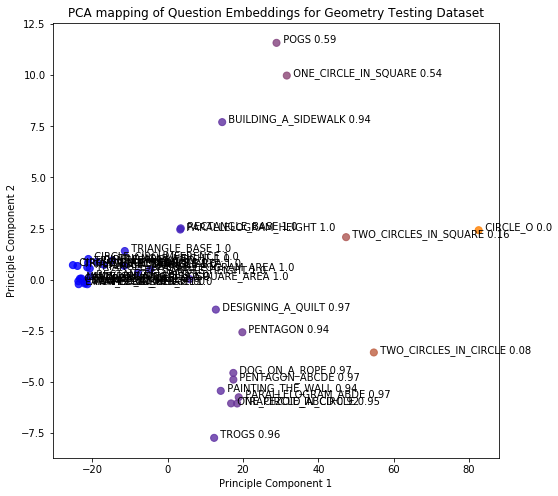

In [71]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

pca = PCA(n_components=2)
# pca = TSNE(n_components=2)

# select_ixs = list(set(list(all_qz.flatten()))) # just get the unique q indices used in our test set
select_ixs = list(numpy.unique(all_qz.flatten()))

# tmp = []
# for ix in select_ixs:
#     qid = qixs[ix]
#     prate = (q_pass[qid]/q_atts[qid]) if q_atts[qid]>0 else 1
#     if prate<1:
#         tmp.append(ix)
# select_ixs = tmp
        
# q_weights = qn_table.get_weights()[0]
q_weights = m.get_layer("qn_embedding").get_weights()[0]
min_q = numpy.min(q_weights)
# min_s = numpy.min(s_table.get_weights()[0])
min_s = numpy.min(m.get_layer("alphas").get_weights()[0] )
min_w = min(min_q, min_s)

q_weights = (q_weights - min_w)


# itemz_2 = q_weights
itemz_2 = pca.fit_transform(q_weights)



fig = plt.gcf()
fig.set_size_inches(8, 8)

import scipy, math
norms = []
for i in select_ixs:
    w = q_weights[i,:]
    norm = scipy.linalg.norm(w)
    norms.append(norm)

norms = numpy.array(norms)-numpy.min(norms)
norms = norms/numpy.max(norms)
rgba_colours = numpy.array([(n,n/2,1-n,0.8) for n in norms])
# rgba_colours = numpy.array([(1,0,0,n) for n in norms])
# print(rgba_colours)

#n = len(itemz_2)
# fig.gca().scatter(itemz_2[n:,0], itemz_2[n:,1], alpha=0.7)
fig.gca().scatter(itemz_2[select_ixs,0], itemz_2[select_ixs,1], color=rgba_colours, s=50)
for qix in select_ixs: # set(tqz.flatten()):
    add_star=False
    if sum(qz==qix)==0:
        add_star=True
    qid = qixs[qix]
    print(qix, qid)
#     print(q)
    w = q_weights[qix,:]
    norm = scipy.linalg.norm(w)
    print(qid)
    x,y = itemz_2[qix,0], itemz_2[qix,1]
#     fig.gca().plot([x,xh],[y,yh],color="#aaaaaa")
    prate = q_pass[qid]/q_atts[qid]
    kcs = p_kc[qid]
#     kcs = "\n".join([k[4:] for k in kcs])
    steps = len(p_st[qid])
    fig.gca().annotate("  {} {}".format(qid,round(prate,2)), (itemz_2[qix,0], itemz_2[qix,1]))
#     fig.gca().annotate("{} {}x{}".format(qid,steps,kcs), (itemz_2[q,0], itemz_2[q,1]))
#     fig.gca().annotate("{} {}\n({} {}) {}".format(("***" if add_star else ""), qid, steps, len(kcs), round(prate,2), round(norm,2)), (itemz_2[qix,0], itemz_2[qix,1]))
#     fig.gca().annotate("{} {}\n({})".format(("***" if add_star else ""), qid, kcs), (itemz_2[qix,0], itemz_2[qix,1]))
fig.gca().set_title("PCA mapping of Question Embeddings for Geometry Testing Dataset")
fig.gca().set_xlabel("Principle Component 1")
fig.gca().set_ylabel("Principle Component 2")
fig.show()

In [149]:
import sys
numpy.set_printoptions(precision=4, suppress=True, threshold=sys.maxsize)
# for ix in select_ixs:
#     print(ix, qixs[ix], sum(qz==ix), sum(tqz==ix), q_weights[ix,:], scipy.linalg.norm(q_weights[ix,:]))
#     print(ix, qixs[ix], sum(qz==ix), sum(tqz==ix), round(scipy.linalg.norm(q_weights[ix,:]),2))

for ix in select_ixs:
    print(qixs[ix],"\n", q_weights[ix])
    print(numpy.sum(q_weights[ix]>1))


DOG_ON_A_ROPE 
 [4.8082 3.7553 4.9009 5.3356 5.0832 5.4778 5.0912 5.037  5.4558 5.1256
 5.0299 5.8594 4.7955 5.2236 4.9814 4.8567 4.7147 4.1159 5.2411 4.2364
 3.9231 3.0661 5.6899 4.6908 5.1888 5.2353 5.2311 5.1769 4.7575 3.974
 5.0292 5.313  4.2362 5.0308 4.8981 4.815  5.4541 4.3033 3.9391 4.3337
 4.7463 4.8103 4.8642 5.3379 5.3405 6.1782 5.6917 5.1394 4.9818 5.0183
 4.5856 5.6761 5.4406 5.0347 5.8432 3.4116 3.7691 5.2151 5.2872 5.3416
 4.4517 4.5602 5.5289 4.9199]
64
LAWN_SPRINKLER_2 
 [0.5446 0.2235 0.892  0.8871 0.7428 0.9033 0.7814 0.8475 0.8495 0.6622
 0.8957 0.8753 0.74   0.7312 0.8159 0.74   0.6469 0.4591 0.8777 0.4891
 0.5688 0.2222 0.7822 0.7652 0.8056 0.7188 0.8394 0.8346 0.6722 0.4683
 0.6718 0.827  0.5577 0.8485 0.601  0.613  0.85   0.7321 0.5384 0.4842
 0.7562 0.7106 0.7336 0.785  0.644  1.036  0.9505 0.8278 0.6825 0.7395
 0.6009 0.8842 0.8647 0.7799 1.0698 0.277  0.3323 0.9263 0.6501 1.0652
 0.7348 0.5245 0.9158 0.8371]
3
CIRCLE_DIAMETER 
 [0.3271 0.018  0.5182 0.5708 0.

0
PARALLELOGRAM_HEIGHT
1
PARALLELOGRAM_HEIGHT
2
PARALLELOGRAM_HEIGHT
3
PARALLELOGRAM_HEIGHT
4
PARALLELOGRAM_HEIGHT
5
PARALLELOGRAM_HEIGHT
6
PARALLELOGRAM_HEIGHT
7
PARALLELOGRAM_HEIGHT
8
PARALLELOGRAM_HEIGHT
9
PARALLELOGRAM_HEIGHT
10
PARALLELOGRAM_HEIGHT
11
PARALLELOGRAM_HEIGHT
12
PARALLELOGRAM_HEIGHT
13
PARALLELOGRAM_HEIGHT
14
PARALLELOGRAM_HEIGHT
15
PARALLELOGRAM_HEIGHT
16
PARALLELOGRAM_HEIGHT
17
PARALLELOGRAM_HEIGHT
18
PARALLELOGRAM_HEIGHT
19
PARALLELOGRAM_HEIGHT
20
PARALLELOGRAM_HEIGHT
21
PARALLELOGRAM_HEIGHT
22
PARALLELOGRAM_HEIGHT
23
PARALLELOGRAM_HEIGHT
24
PARALLELOGRAM_HEIGHT
25
PARALLELOGRAM_HEIGHT
26
PARALLELOGRAM_HEIGHT
27
PARALLELOGRAM_HEIGHT
28
PARALLELOGRAM_HEIGHT
29
PARALLELOGRAM_HEIGHT
30
PARALLELOGRAM_HEIGHT
31
PARALLELOGRAM_HEIGHT
32
PARALLELOGRAM_HEIGHT
33
PARALLELOGRAM_HEIGHT
34
PARALLELOGRAM_HEIGHT
35
PARALLELOGRAM_HEIGHT
36
PARALLELOGRAM_HEIGHT
37
PARALLELOGRAM_HEIGHT
38
PARALLELOGRAM_HEIGHT
39
PARALLELOGRAM_HEIGHT
40
PARALLELOGRAM_HEIGHT
41
PARALLELOGRAM_HEIGHT
42

/home/rjm49/.venvs/isaac/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


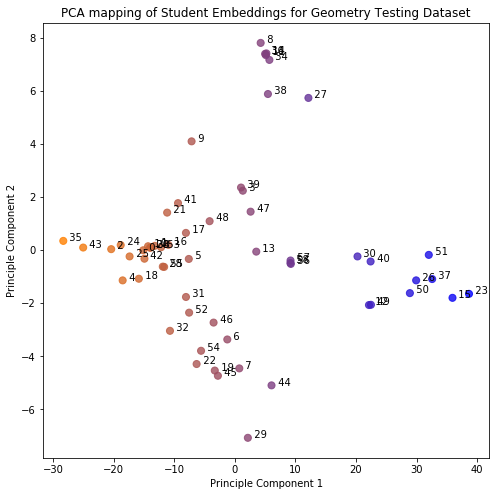

In [175]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

pca = PCA(n_components=2)
# pca = TSNE(n_components=2)

# select_ixs = list(set(list(all_qz.flatten()))) # just get the unique q indices used in our test set
select_ixs = list(numpy.unique(all_sz.flatten()))

# tmp = []
# for ix in select_ixs:
#     qid = qixs[ix]
#     prate = (q_pass[qid]/q_atts[qid]) if q_atts[qid]>0 else 1
#     if prate<1:
#         tmp.append(ix)
# select_ixs = tmp
        
# s_weights = s_table.get_weights()[0]
s_weights = m.get_layer("alphas").get_weights()[0]
q_weights = m.get_layer("qn_embedding").get_weights()[0]
min_q = numpy.min(q_weights)
min_s = numpy.min(s_weights)
min_w = min(min_q, min_s)

s_weights = (s_weights - min_w)


# itemz_2 = q_weights
itemz_2 = pca.fit_transform(s_weights)

fig = plt.gcf()
fig.set_size_inches(8,8)

import scipy, math
norms = []
for i in select_ixs:
    w = s_weights[i,:]
    norm = scipy.linalg.norm(w)
    norms.append(norm)
#     norm = numpy.mean(w)
#     norms.append(norm)

norms = numpy.array(norms)-numpy.min(norms)
norms = norms/numpy.max(norms)
rgba_colours = numpy.array([(n,n/2,1-n,0.8) for n in norms])
# rgba_colours = numpy.array([(1,0,0,n) for n in norms])
# print(rgba_colours)

#n = len(itemz_2)
# fig.gca().scatter(itemz_2[n:,0], itemz_2[n:,1], alpha=0.7)
fig.gca().scatter(itemz_2[select_ixs,0], itemz_2[select_ixs,1], color=rgba_colours, s=50)
for six in select_ixs: # set(tqz.flatten()):
    print(six)
    add_star=False
    if sum(sz==six)==0:
        add_star=True
#     qid = qixs[qix]
#     print(qix, qid)
#     print(q)
    w = s_weights[six,:]
    norm = numpy.median(w) #scipy.linalg.norm(w)
    print(qid)
    x,y = itemz_2[six,0], itemz_2[six,1]
#     fig.gca().plot([x,xh],[y,yh],color="#aaaaaa")
#     prate = q_pass[qid]/q_atts[qid]
#     kcs = p_kc[qid]
#     kcs = "\n".join([k[4:] for k in kcs])
    steps = len(p_st[qid])
    fig.gca().annotate("  {}".format(six, norm), (x,y))
#     fig.gca().annotate("{} {}x{}".format(qid,steps,kcs), (itemz_2[q,0], itemz_2[q,1]))
#     fig.gca().annotate("{} {}\n({} {}) {}".format(("***" if add_star else ""), qid, steps, len(kcs), round(prate,2), round(norm,2)), (itemz_2[qix,0], itemz_2[qix,1]))
#     fig.gca().annotate("{} {}\n({})".format(("***" if add_star else ""), qid, kcs), (itemz_2[qix,0], itemz_2[qix,1]))
fig.gca().set_title("PCA mapping of Student Embeddings for Geometry Testing Dataset")
fig.gca().set_xlabel("Principle Component 1")
fig.gca().set_ylabel("Principle Component 2")
fig.show()

In [151]:
from keras.regularizers import l1
from keras.layers import Dropout, multiply, subtract, GaussianNoise, GaussianDropout, Input, Lambda, Dense
from keras import backend as K
from keras import Model
def generate_multilabel_model(n_factors, optimiser):
    outw = len(KCs)
    qn_emb = Input(shape=(n_factors,), name="q_embedding")
  
    h = qn_emb
#     h = Dense( n_factors, activation="relu")(h)
#     h = Dense( (n_factors + outw)//2, activation="relu")(h)
#     h = Dense( 5, activation="relu")(h)
#     h = Dense( 5, activation="relu")(h)
    h = Dense(30, activation="relu")(h)
    kc_pred = Dense(outw, activation="sigmoid")(h)
    
    model = Model(inputs=qn_emb, outputs=kc_pred)
    model.compile(optimizer=optimiser, loss="binary_crossentropy", metrics=["accuracy"])
#     model.compile(optimizer=optimiser, loss="mse", metrics=["accuracy"])

    print(model.summary())

    return model

In [4]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor="val_loss", restore_best_weights=True, patience=10)
# qws = qn_table.get_weights()[0]
qws = m.get_layer("qn_embedding").get_weights()[0]
ww = qws.shape[1]
qn_embs = []
kc_list = []
KCs = list(KCs)

ixs = [ix for ix in range(len(qws))]
numpy.random.seed(666)
tr_ixs = numpy.random.choice(ixs, size=int(0.9*len(ixs)), replace=False)
print(len(tr_ixs))

overall_kc_list = []
overall_kc_set = set()

tt_ixs = set(ixs) - set(tr_ixs)
for ix in tr_ixs:
    qid = qixs[ix]
    qn_embs.append(qws[ix])
    kcs = p_kc[qid]
    
    for kc in kcs:
        kcix = KCs.index(kc)
        overall_kc_list.append(kcix)
        overall_kc_set.add(kcix)
    
    kc_ohe = [0 for _ in KCs]
    for kc in kcs:
        kcix = KCs.index(kc)
        kc_ohe[kcix] = 1
    kc_list.append(kc_ohe)
print(len(qn_embs))

print(overall_kc_set)
print(overall_kc_list)
from sklearn.utils.class_weight import compute_class_weight
class_wgts_sk = compute_class_weight("balanced", list(overall_kc_set), list(overall_kc_list))
print("len overall kc set", len(overall_kc_set))
print(class_wgts_sk)

qn_embs = numpy.array(qn_embs)
kc_list = numpy.array(kc_list)

kc_sums = numpy.sum(kc_list, axis=0)
kc_max = numpy.max(kc_sums)
print(kc_max)
kc_sums = kc_max / kc_sums

print("KC sums", kc_sums)
class_wgts = {}
for ix,kcs in enumerate(kc_sums):
    class_wgts[ix] = kcs

print(class_wgts)
print(ww)

NameError: name 'm' is not defined

In [2]:
qn_embs = qws
print("QN embs\n", qn_embs)
print("KC list\n",kc_list)
print("#samples:", 0.9*len(tr_ixs), 0.1*len(tr_ixs), len(tt_ixs))
# from sklearn.metrics import multilabel_confusion_matrix

f1_list = []
n_reps = 10
for _ in range(n_reps):
    qn_embs = numpy.reshape(qn_embs, (-1, ww))
    kc_list = numpy.reshape(kc_list, (-1, n_factors))

    emb_mod = generate_multilabel_model(ww, Adam())
    emb_mod.fit(qn_embs, kc_list, batch_size=int(len(tr_ixs)/20), epochs = 1000000, validation_split=0.1, class_weight=class_wgts_sk, callbacks=[es])

    qn_embs = []
    kc_list = []
    for ix in tt_ixs:
        qid = qixs[ix]
        qn_embs.append(qws[ix])
        kcs = p_kc[qid]
        kc_ohe = [0 for _ in KCs]
        for kc in kcs:
            kcix = KCs.index(kc)
            kc_ohe[kcix] = 1
        kc_list.append(kc_ohe)

    qn_embs = numpy.array(qn_embs)
    kc_list = numpy.array(kc_list)
    print("QN embs\n", qn_embs)
    print("KC list\n",kc_list)

    # print("test:", emb_mod.evaluate(qn_embs, kc_list))
    predz = emb_mod.predict(qn_embs)
    print((predz>=0.5).astype(int))

    # print("test:", f1_score(kc_list, preds>=0.5))

    print(confusion_matrix(kc_list.flatten(), (predz.flatten() >= 0.5 )))
    this_f1 = f1_score(kc_list.flatten(), (predz.flatten() >= 0.5 ))#, average="macro")
    print(this_f1)
    f1_list.append( this_f1)

print(f1_list)
print(numpy.mean(f1_list), numpy.std(f1_list))
    # print(multilabel_confusion_matrix(kc_list, (predz >= 0.5 )))

NameError: name 'qws' is not defined